# Modelo de classificação - células tumorais

O dataset aqui utilizado pode ser encontrado através do link: (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

Trata-se de um conjunto de dados referentes a celulas de uma massa mamária. ***O objetivo aqui é de classificar as células tumorais malignas ou benignas.*** 
Segue as informações das features que foram coletadas:

"Attribute Information:

**id**

**diagnosis:** M = malignant, B = benign
Columns 3 to 32

Ten real-valued features are computed for each cell nucleus:

1. **radius**: distances from center to points on the perimeter
2. **texture:** standard deviation of gray-scale values
3. **perimeter**
4. **area**
5. **smoothness:** local variation in radius lengths
6. **compactness:** perimeter^2 / area - 1.0
7. **concavity:** severity of concave portions of the contour
8. **concave points:** number of concave portions of the contour
9. **symmetry**
10. **fractal dimension:** "coastline approximation" - 1

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius"

## Importando os dados 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Análise exploratória

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

1. Remover as colunas 'id' e 'Unnamed: 32' pois não serão úteis

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df = df.drop(['id', 'Unnamed: 32'], axis = 'columns')
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/8v/bkfbjnqs7vd88g5wz1vgwpp00000gn/T/ipykernel_89231/3343981635.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


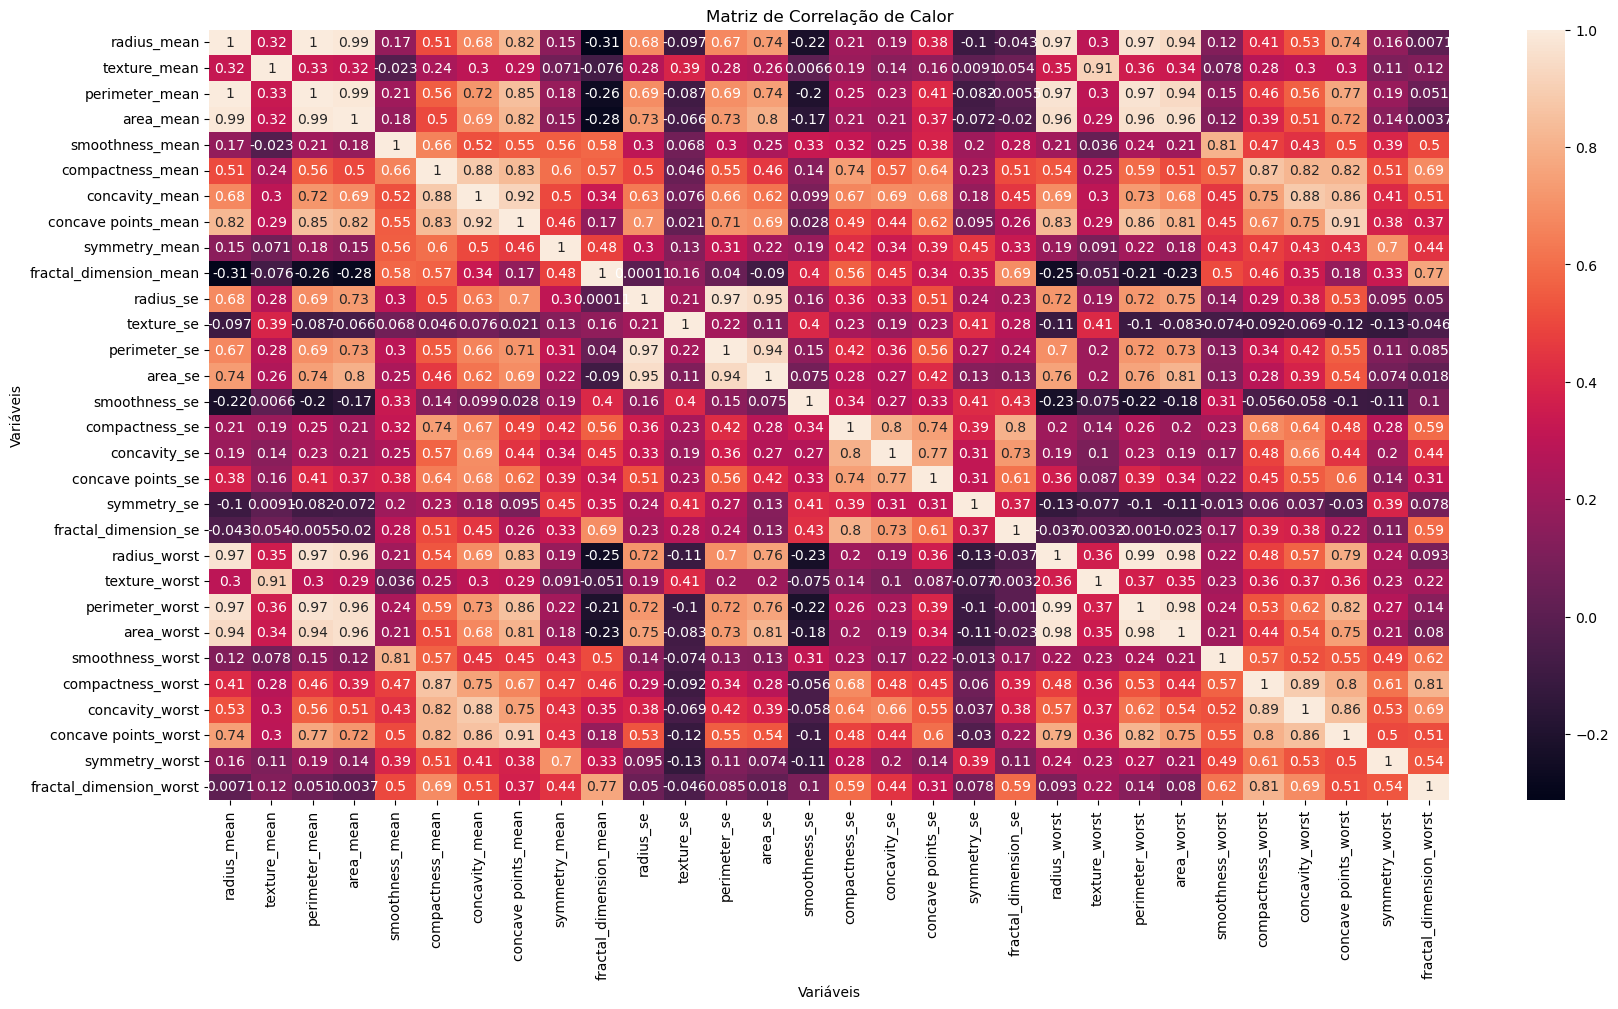

In [8]:
correlacao = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(correlacao, annot = True)
plt.xlabel("Variáveis")
plt.ylabel("Variáveis")
plt.title("Matriz de Correlação de Calor")
plt.show()

**Temos variáveis que são multicolineares. Como isso pode afetar o desempenho do nosso modelo, iremos remover esses dados.**

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
limite_correlacao = 0.90

colunas_a_remover = []

for col in range(len(correlacao.columns)):
    for row in range(col):
        if abs(correlacao.iloc[row, col]) > limite_correlacao:
            coluna = correlacao.columns[col]
            colunas_a_remover.append(coluna)
      
print(colunas_a_remover)

['perimeter_mean', 'area_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'area_se', 'radius_worst', 'radius_worst', 'radius_worst', 'texture_worst', 'perimeter_worst', 'perimeter_worst', 'perimeter_worst', 'perimeter_worst', 'area_worst', 'area_worst', 'area_worst', 'area_worst', 'area_worst', 'concave points_worst']


In [11]:
df = df.drop(colunas_a_remover, axis=1)

In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
df.shape

(569, 21)

/var/folders/8v/bkfbjnqs7vd88g5wz1vgwpp00000gn/T/ipykernel_89231/3343981635.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


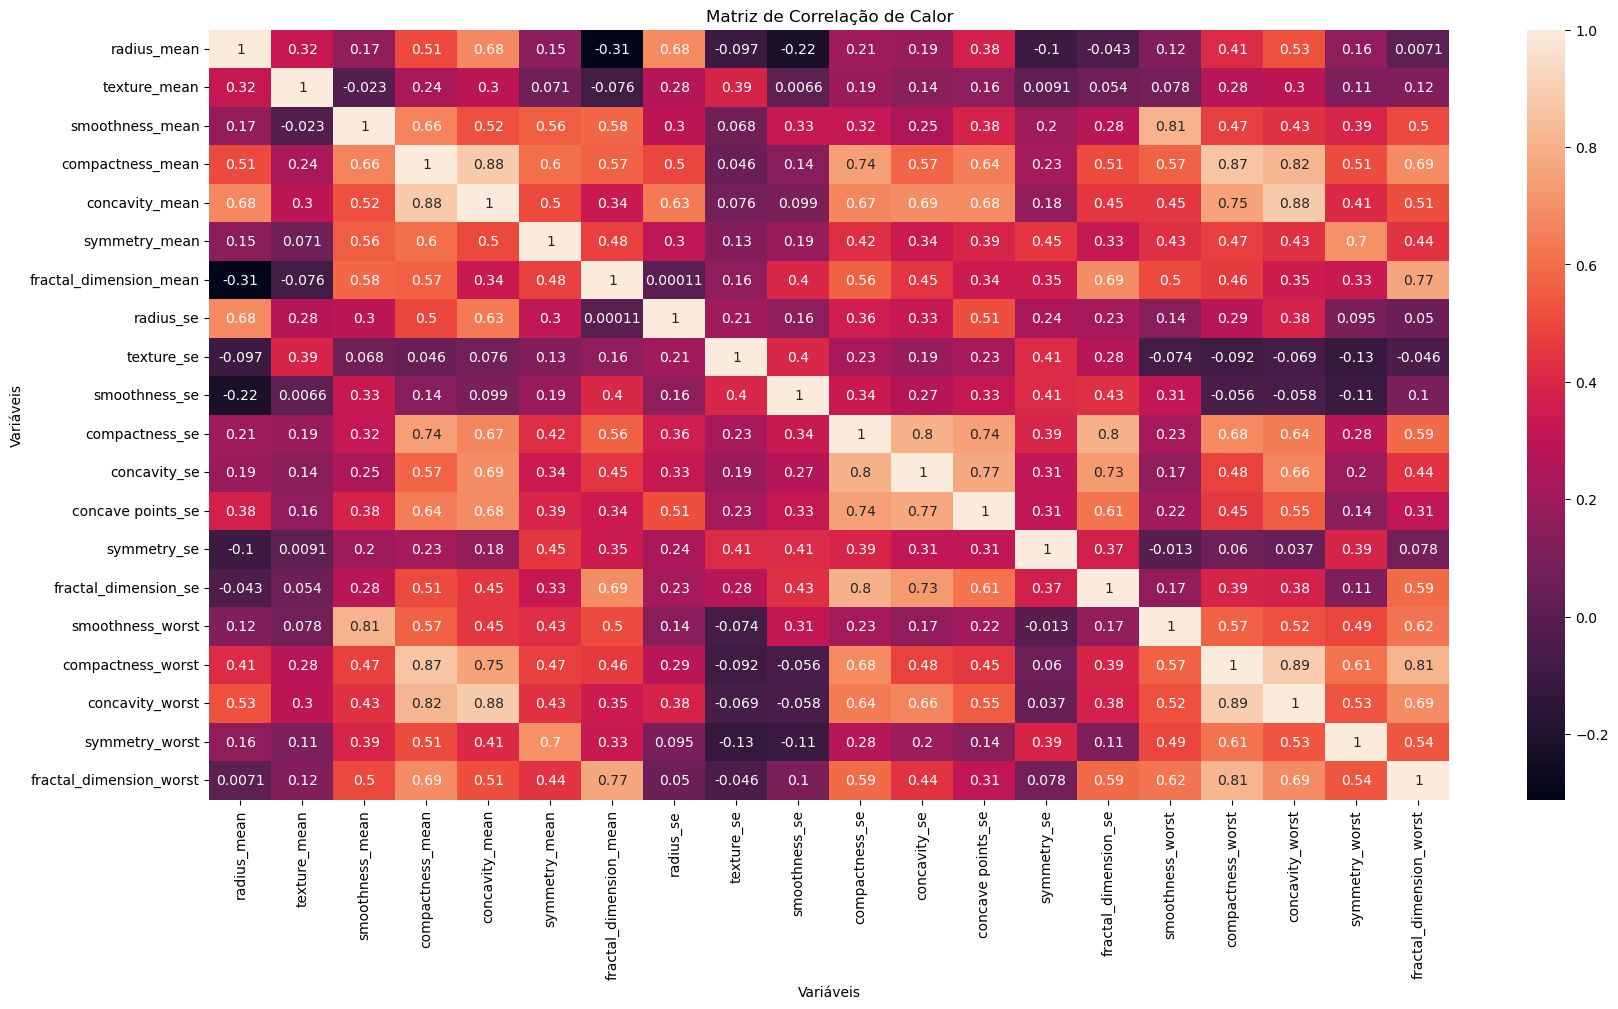

In [14]:
correlacao = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(correlacao, annot = True)
plt.xlabel("Variáveis")
plt.ylabel("Variáveis")
plt.title("Matriz de Correlação de Calor")
plt.show()

### Vamos dar uma olhada na distribuição dos dados

In [15]:
df.shape

(569, 21)

In [16]:
X = df.drop(['diagnosis'], axis = 'columns').copy()
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [17]:
y = df['diagnosis'].copy()
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


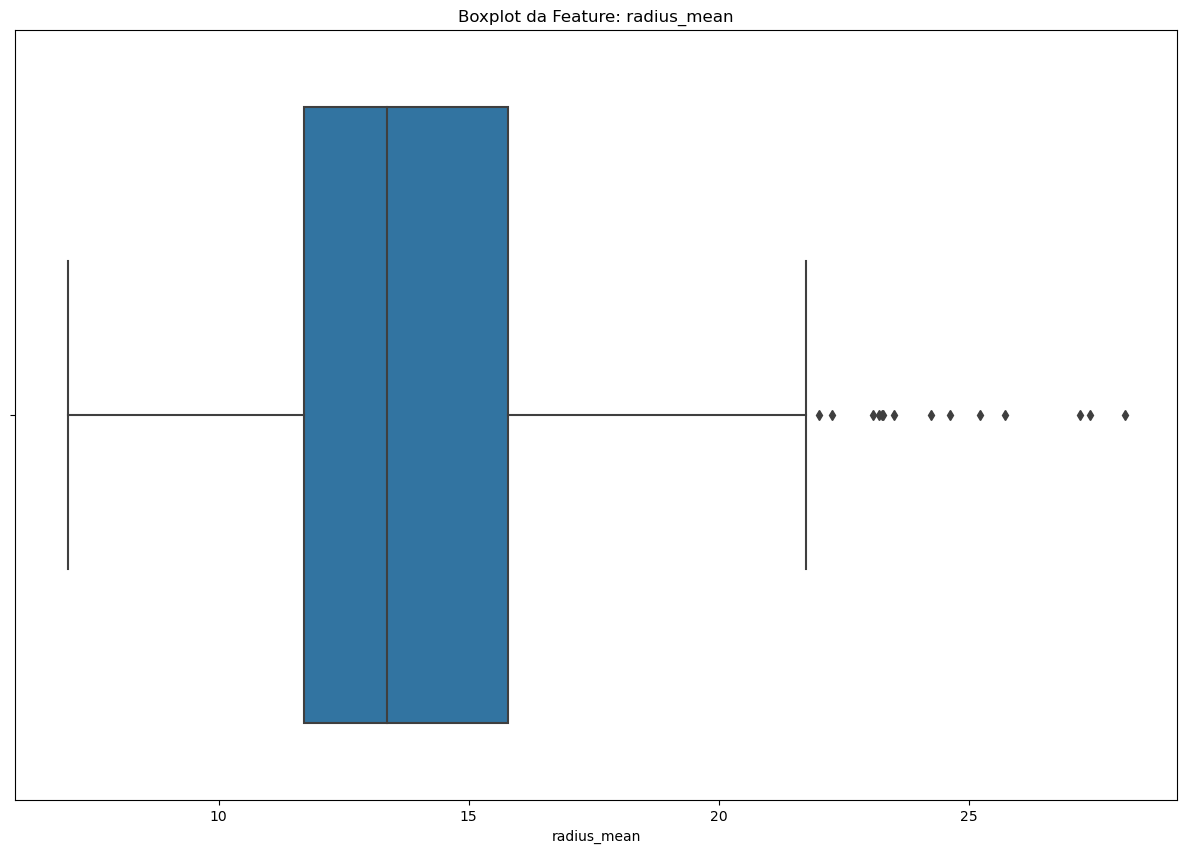

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


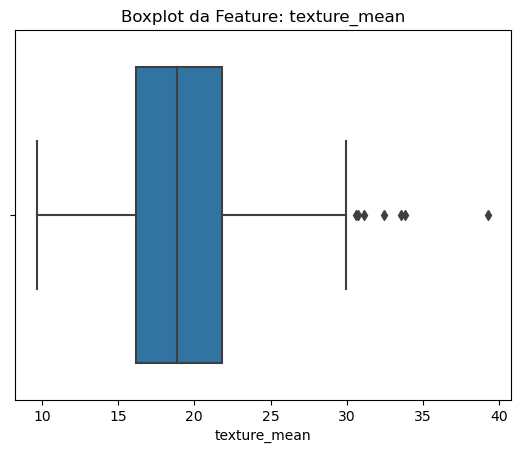

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


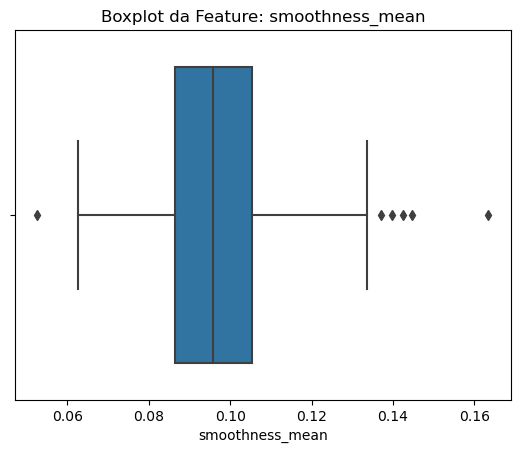

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


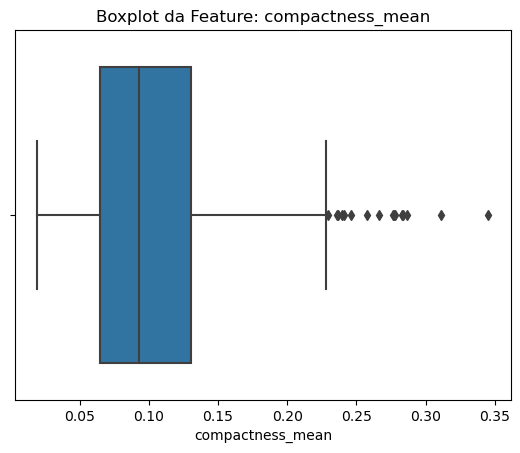

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


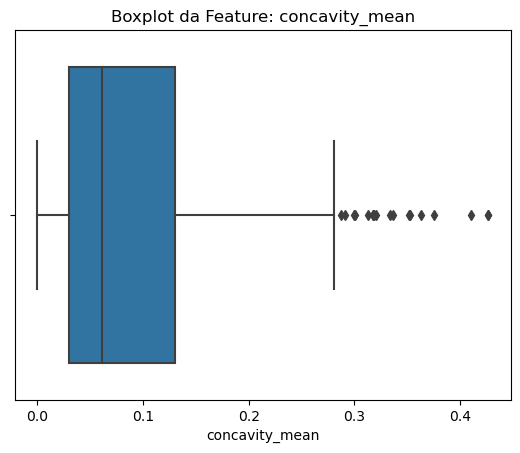

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


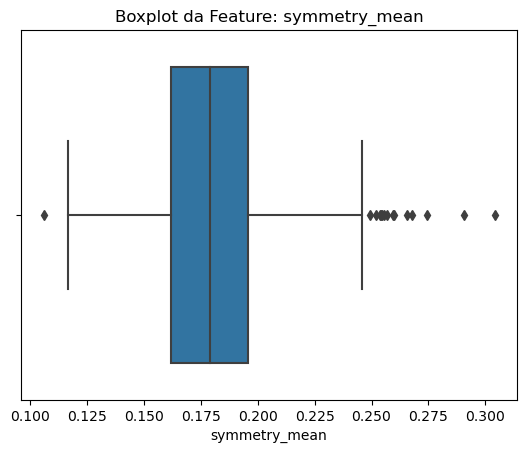

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


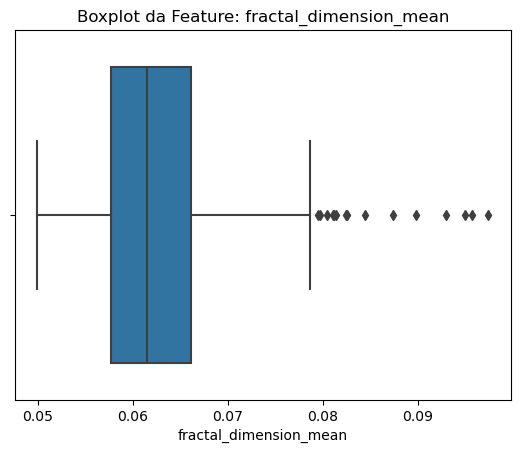

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


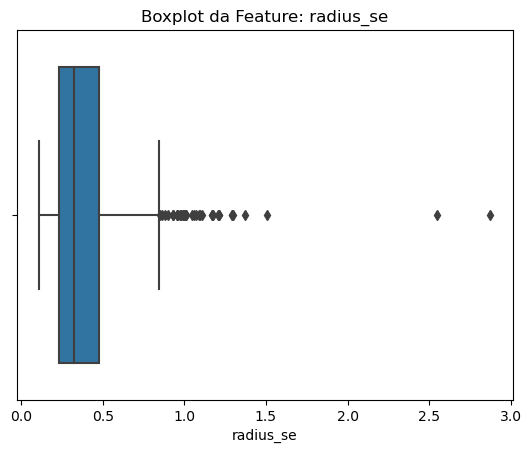

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


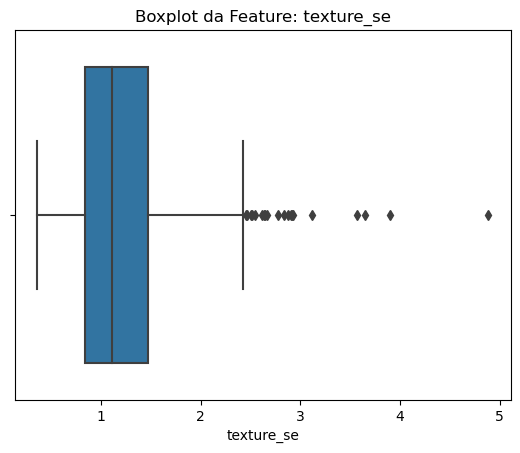

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


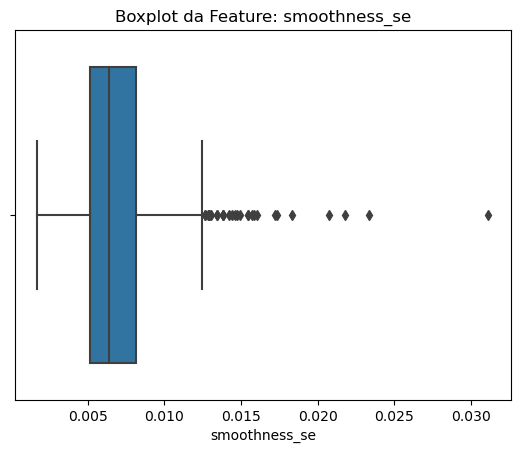

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


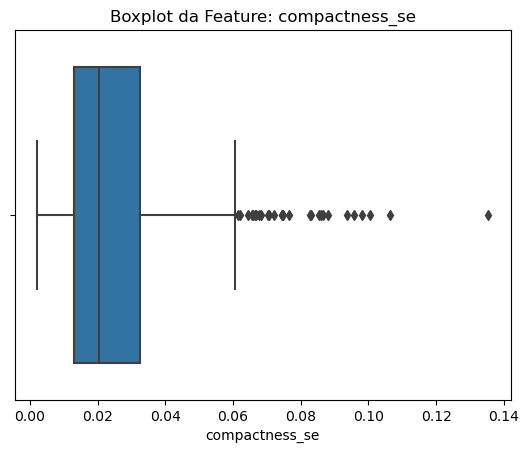

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


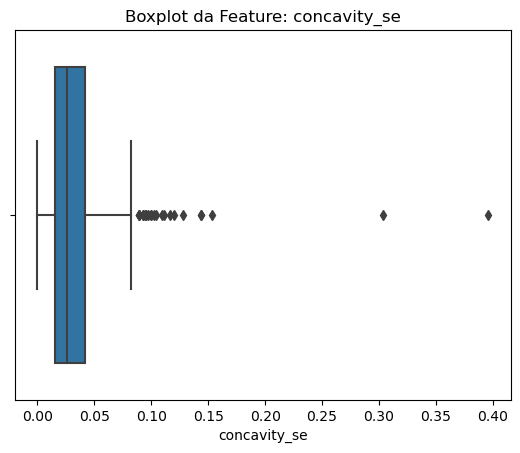

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


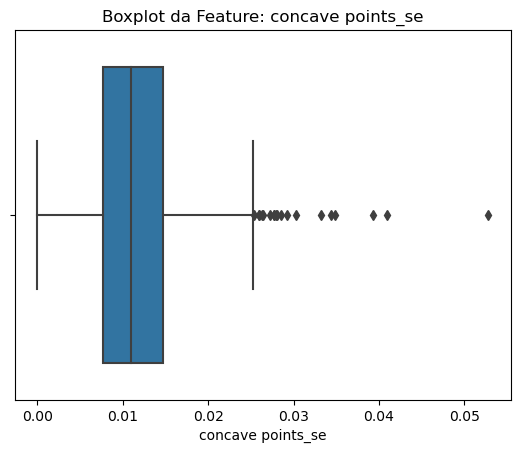

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


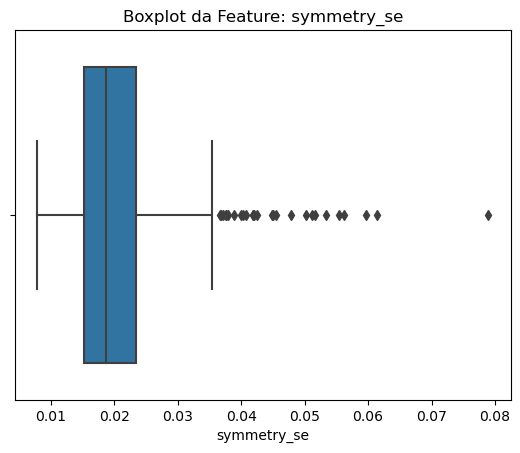

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


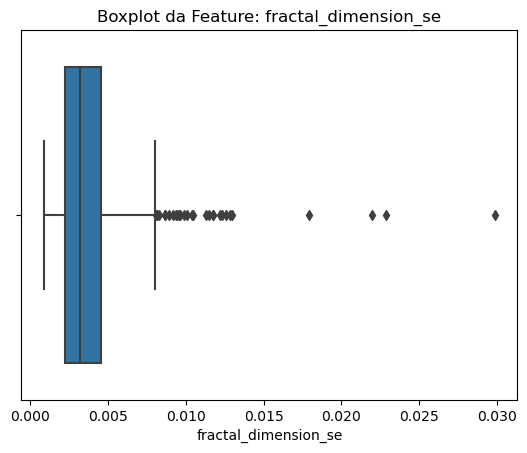

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


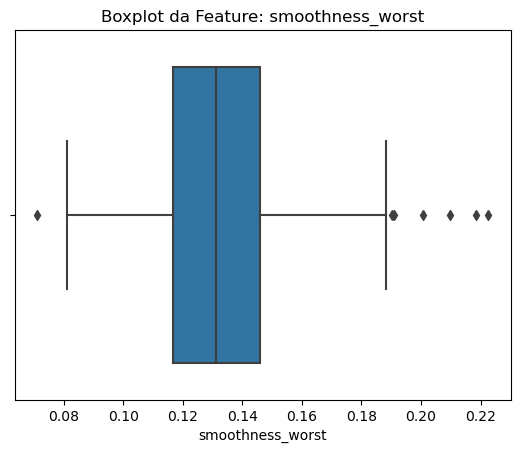

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


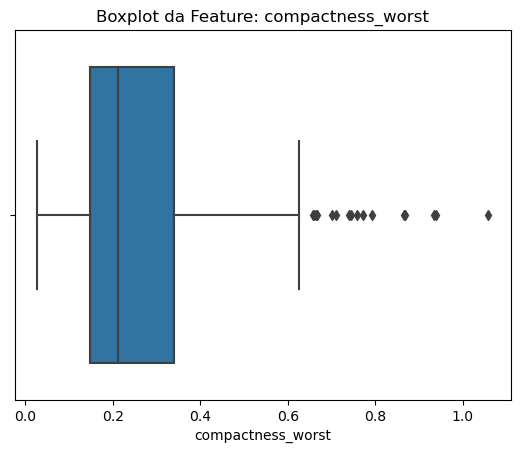

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


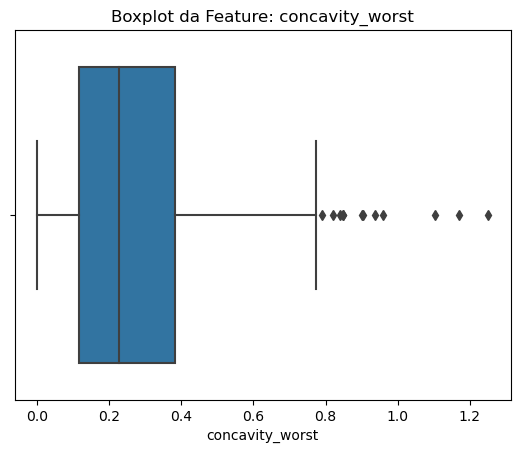

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


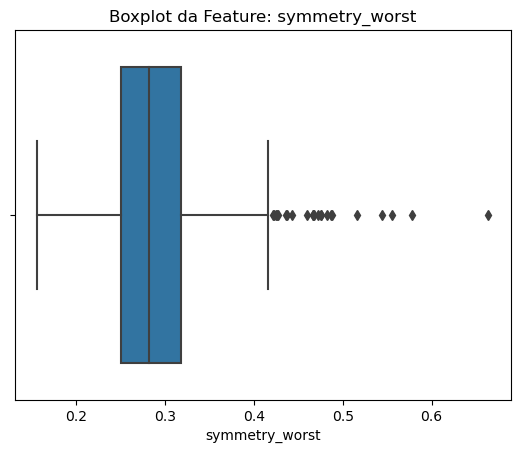

/Users/felipecordeiro/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


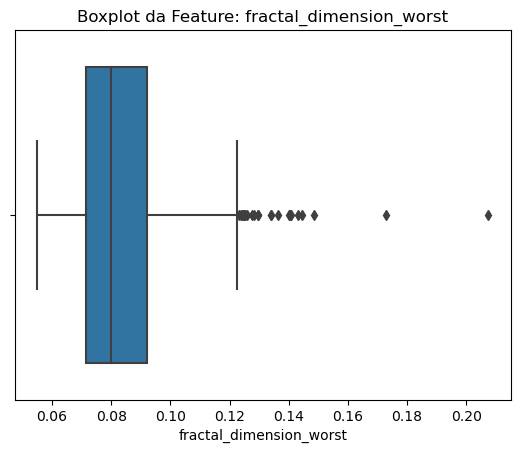

In [18]:
plt.figure(figsize=(15, 10))

for feature in X.columns:
    sns.boxplot(x=feature, data=X, orient="v")
    plt.title(f"Boxplot da Feature: {feature}")
    plt.show()

**Aqui temos algumas questões:
A morfologia celular diferencia bastante quando se trata de uma célula maligna. Como podemos notar, temos possíveis candidatos a outliers em basicamente todas as features. Mas então, seriam Outliers ou seriam apenas as diferenças morfológicas entre células benignas e malígnas? Vamos verificar a distribuição desses dados..**

### Distribuição dos dados

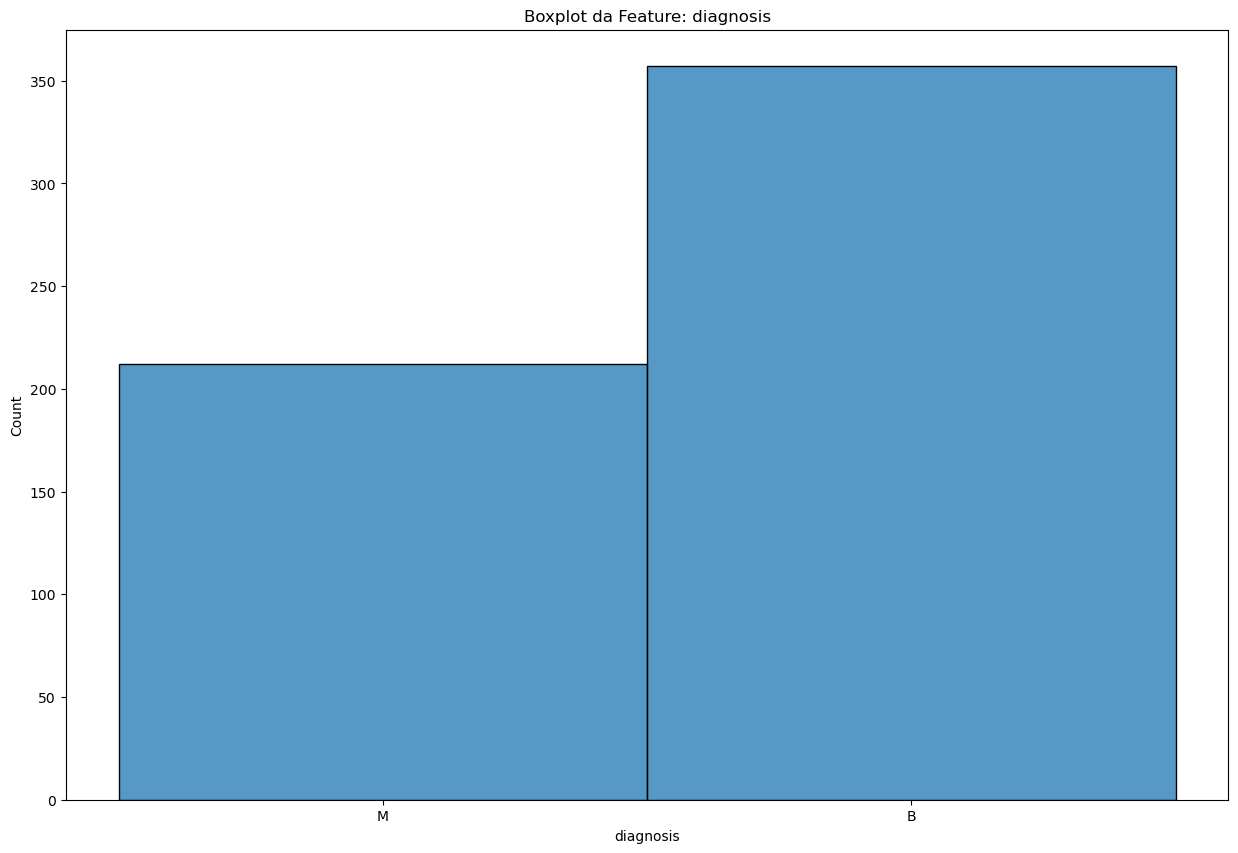

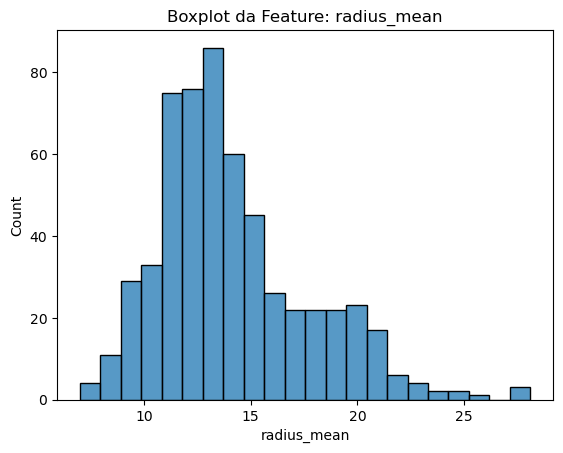

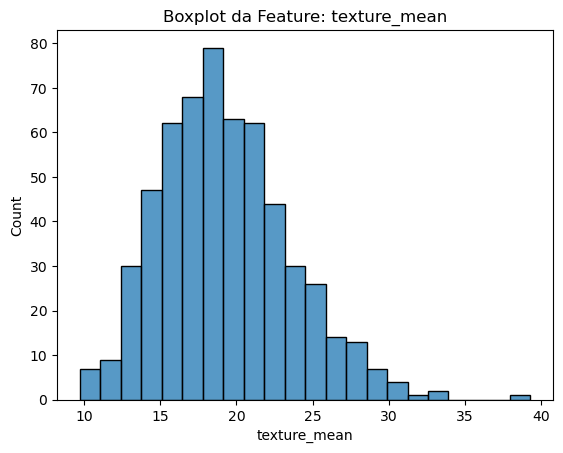

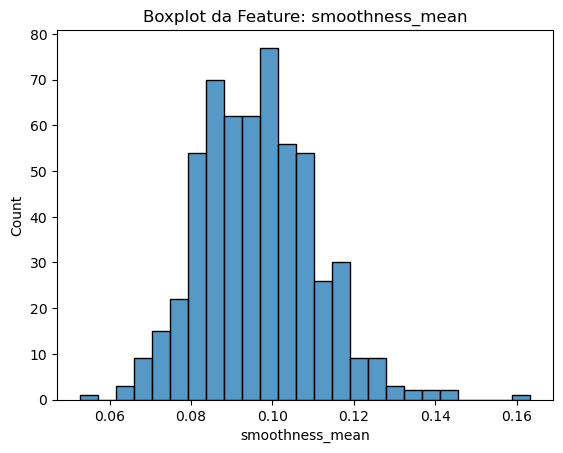

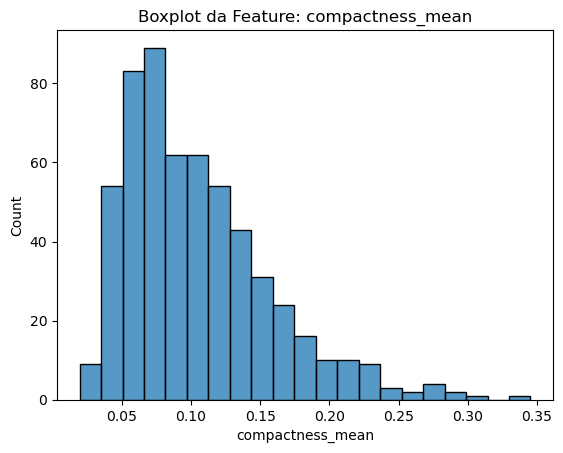

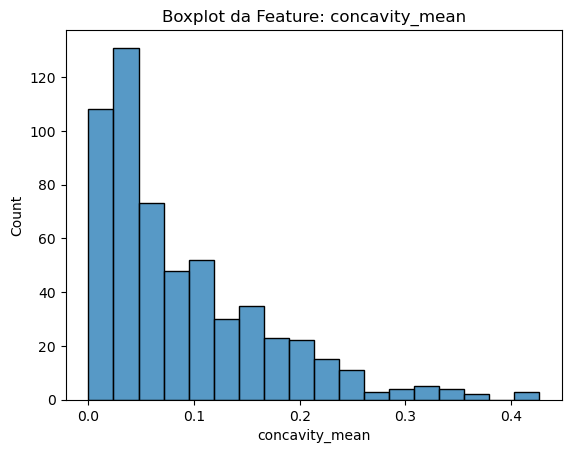

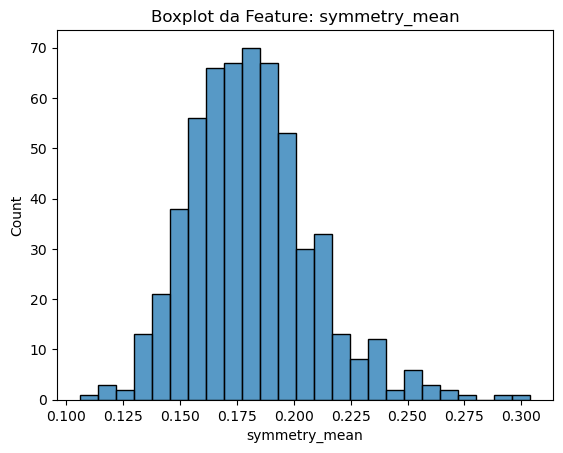

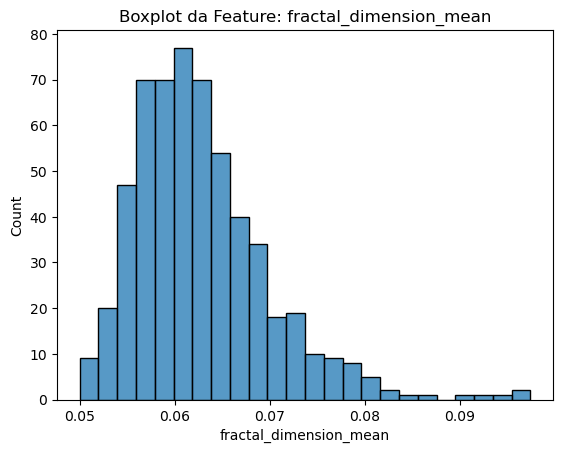

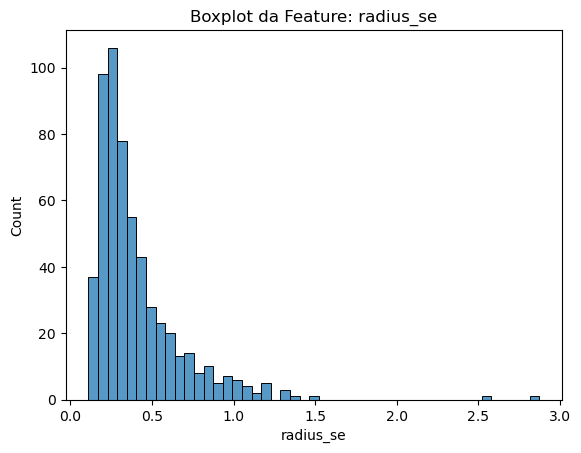

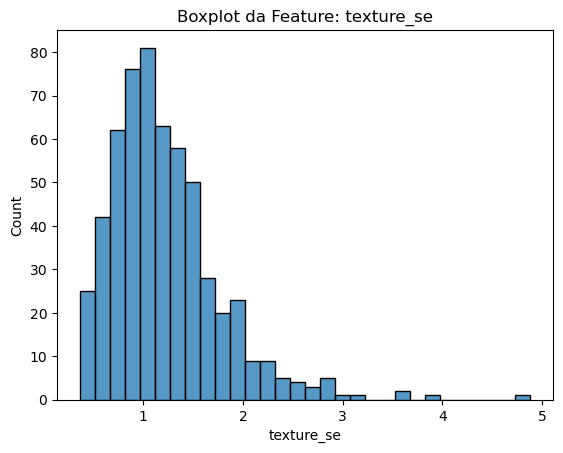

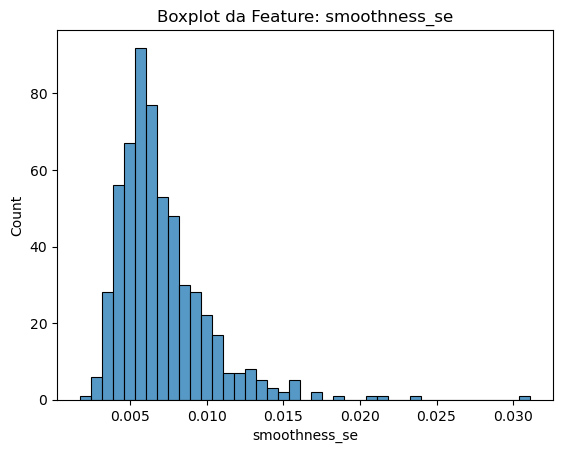

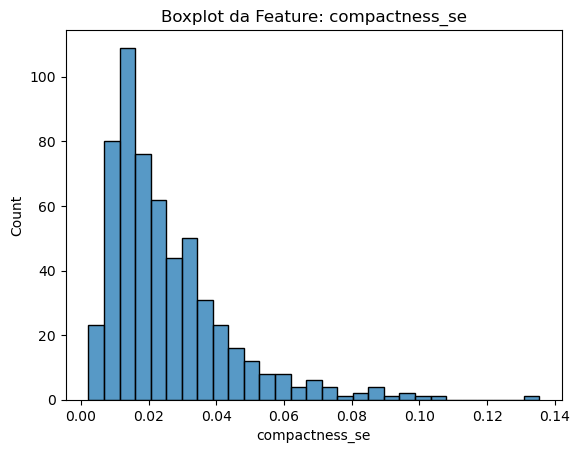

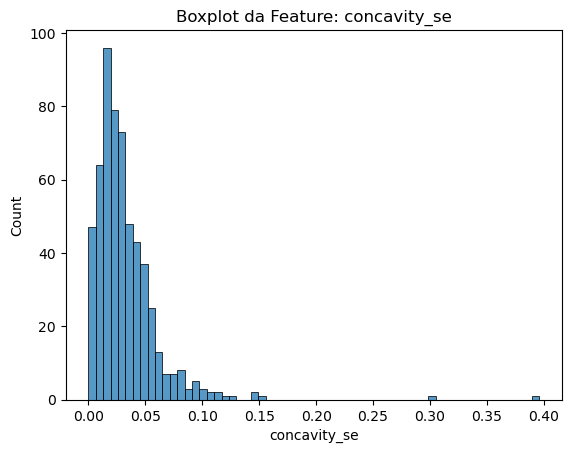

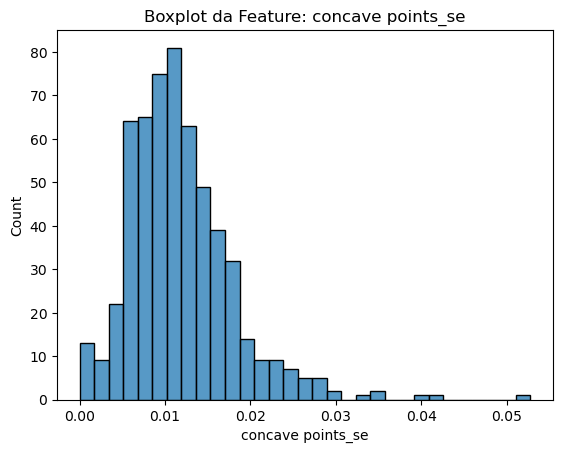

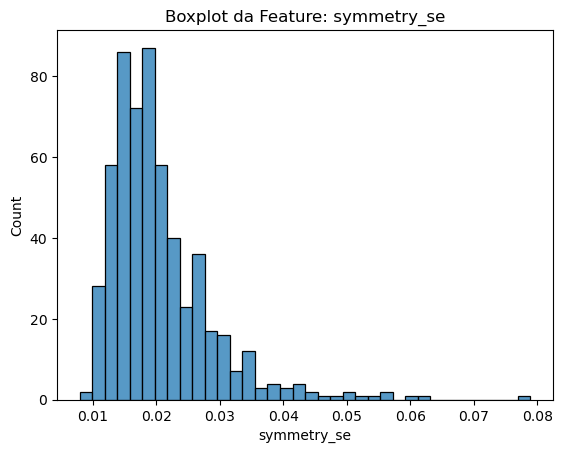

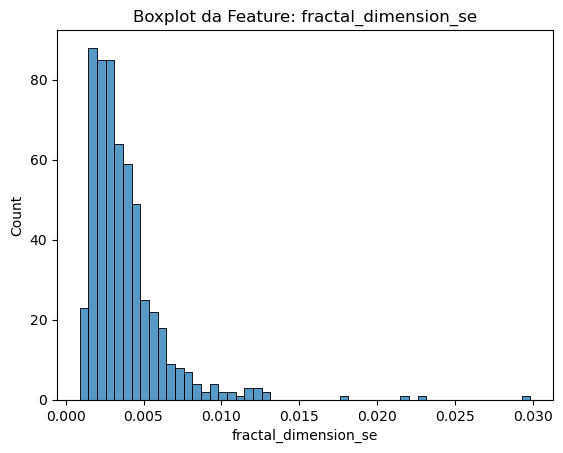

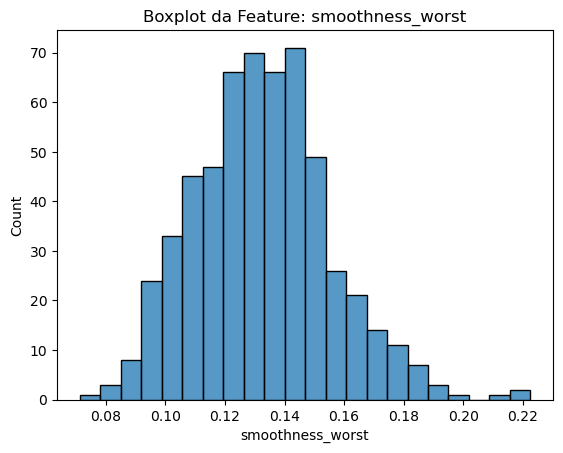

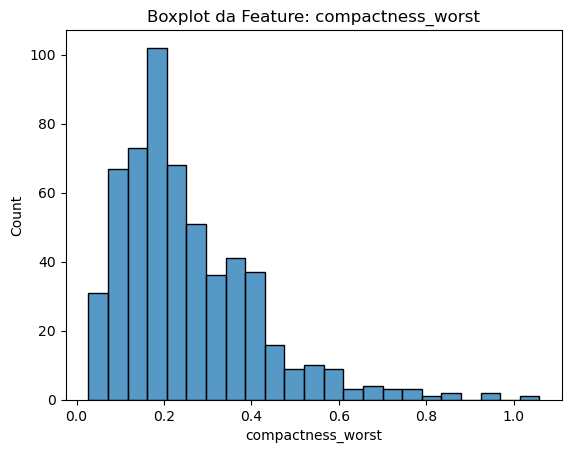

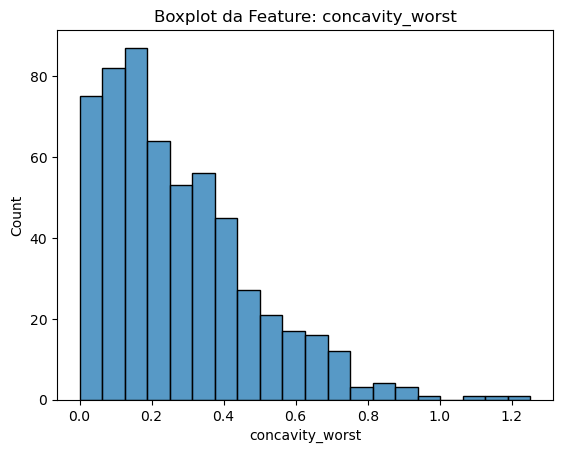

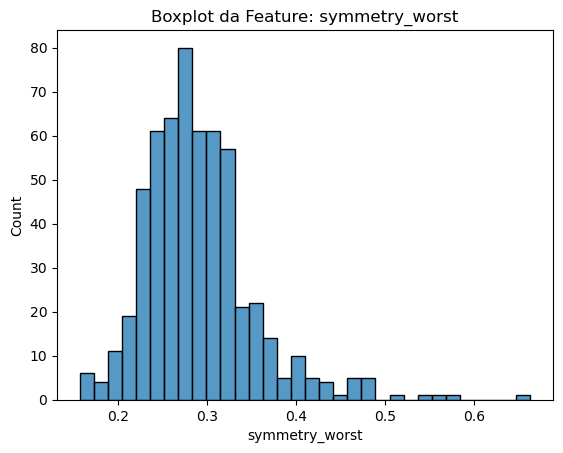

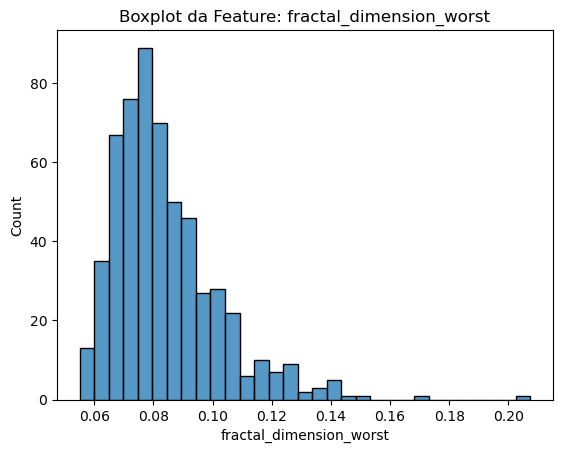

In [19]:
plt.figure(figsize=(15, 10))

for feature in df.columns:
    sns.histplot(x=feature, data=df)
    plt.title(f"Boxplot da Feature: {feature}")
    plt.show()

**Nos gráficos de histograma vemos que as distribuições não são simétricas.**
**Decidi por deixar esses valores, pois como temos poucos dados, nosso modelo pode ter um underfitting caso tenha poucos dados.**

### Transformando as variáveis categóricas

In [20]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

### Verificando se existem valores iguais a zero

In [21]:
for col in df.columns:
    print(f' O valor mínimo da coluna {col} e:  {df[col].min()}')

 O valor mínimo da coluna diagnosis e:  0
 O valor mínimo da coluna radius_mean e:  6.981
 O valor mínimo da coluna texture_mean e:  9.71
 O valor mínimo da coluna smoothness_mean e:  0.05263
 O valor mínimo da coluna compactness_mean e:  0.01938
 O valor mínimo da coluna concavity_mean e:  0.0
 O valor mínimo da coluna symmetry_mean e:  0.106
 O valor mínimo da coluna fractal_dimension_mean e:  0.04996
 O valor mínimo da coluna radius_se e:  0.1115
 O valor mínimo da coluna texture_se e:  0.3602
 O valor mínimo da coluna smoothness_se e:  0.001713
 O valor mínimo da coluna compactness_se e:  0.002252
 O valor mínimo da coluna concavity_se e:  0.0
 O valor mínimo da coluna concave points_se e:  0.0
 O valor mínimo da coluna symmetry_se e:  0.007882
 O valor mínimo da coluna fractal_dimension_se e:  0.0008948
 O valor mínimo da coluna smoothness_worst e:  0.07117
 O valor mínimo da coluna compactness_worst e:  0.02729
 O valor mínimo da coluna concavity_worst e:  0.0
 O valor mínimo da 

In [22]:
X = df.drop(['diagnosis'], axis = 'columns').copy()
X.head(3)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758


In [23]:
y = df['diagnosis'].copy()
y.head(3)

0    1
1    1
2    1
Name: diagnosis, dtype: int64

In [24]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [25]:
colunas = ['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

### Tratando os valores iguais a zero

In [26]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(strategy='median')
X[X == 0] = np.nan
X_tratado = imputer.fit_transform(X)
X_tratado = pd.DataFrame(X_tratado, columns=colunas)

In [27]:
X_tratado.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [28]:
valores_zero = (X_tratado == 0)
total_zeros = valores_zero.sum().sum()
total_zeros

0

In [29]:
X = X_tratado.copy()

### Pré-processamento dos dados

**1. Separar os dados de treinamento e de teste**

**2. Normalizar os valores numéricos**

**Separando os dados de treinamento e de teste**

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
n_splits = 1 
test_size = 0.2
stratified_split = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=1)

In [31]:
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 20)
(114, 20)
(455,)
(114,)


**Normalizando os dados.**

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normalizado = scaler.fit_transform(X_train)
X_train_normalizado = pd.DataFrame(X_train_normalizado, columns=X_train.columns)

In [34]:
X_train_normalizado.head(3)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.290083,0.274689,0.241762,0.093863,0.089352,0.388384,0.136229,0.033956,0.121199,0.121868,0.097124,0.056963,0.119713,0.149828,0.043434,0.254441,0.119636,0.139627,0.287601,0.094779
1,0.345858,0.723651,0.421233,0.276929,0.103188,0.240909,0.243008,0.103880,0.250133,0.188428,0.179533,0.050639,0.275256,0.181770,0.152329,0.349534,0.193178,0.104591,0.135029,0.184770
2,0.337052,0.456017,0.389546,0.243384,0.085007,0.282828,0.352542,0.065900,0.151786,0.155862,0.141312,0.064400,0.132430,0.098750,0.093425,0.364723,0.171154,0.108671,0.134831,0.195986


# Escolhendo os modelos e otimizando os hiperparametros

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, random_state=3, shuffle=True)
dec_tree_clf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(dec_tree_clf, X_train_normalizado, y_train, scoring='accuracy', cv=cv)
scores

array([0.9010989 , 0.91208791, 0.89010989, 0.91208791, 0.9010989 ])

In [36]:
from sklearn.model_selection import RandomizedSearchCV

param_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

decision_tree_rd = RandomizedSearchCV(dec_tree_clf, param_space, n_iter=40,
                                      scoring="accuracy", verbose=True, cv=5,
                                      n_jobs=-1, random_state=42)

decision_tree_rd.fit(X_train_normalizado, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy', verbose=True)

In [37]:
print(decision_tree_rd.best_score_)

0.9010989010989011


### RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()

scores = cross_val_score(random_forest_clf, X_train_normalizado, y_train, scoring='accuracy', cv=cv)

scores

array([0.94505495, 0.97802198, 0.89010989, 0.98901099, 0.93406593])

In [39]:
param_space_forest = {"bootstrap": [True],
        "max_depth": [5, 10, 15, 20, 25],
        "max_features": ['sqrt','log2'],
        "min_samples_leaf": [2, 3, 4, 5],
        "min_samples_split": [1, 2, 3, 4, 5],
        "n_estimators": [100, 150, 200, 250, 300, 350, 400]
}

random_forest_rs = RandomizedSearchCV(random_forest_clf, param_space_forest, n_iter=40,
                                        scoring="accuracy", verbose=True, cv=5,
                                       random_state=42)

random_forest_rs.fit(X_train_normalizado, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=40,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=42, scoring='accuracy', verbose=True)

In [40]:
print(random_forest_rs.best_score_)

0.9538461538461538


In [41]:
random_forest_rs.best_params_

{'n_estimators': 350,
 'min_samples_split': 1,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 15,
 'bootstrap': True}

# Treinando e testando o modelo

In [42]:
X_test_normalizado = scaler.fit_transform(X_test)
X_test_normalizado = pd.DataFrame(X_test_normalizado, columns=X_test.columns)

In [43]:
random_forest_final = RandomForestClassifier(n_estimators = 400, min_samples_split = 1, min_samples_leaf = 2,
                                             max_features = 'log2' ,max_depth = 15, bootstrap = True)

random_forest_final.fit(X_train_normalizado, y_train)

RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=2,
                       min_samples_split=1, n_estimators=400)

In [44]:
from sklearn.metrics import classification_report
y_predict = random_forest_final.predict(X_test_normalizado)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

